### Electronics Sales Data Analysis

In this video we use Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 

In [218]:
# Import necessary libraries
import pandas as pd
import os


#### Merging 12 months of sales data into a single file 

In [219]:
file_path = './Electronics_Sales_Analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
# df = pd.read_csv(file_path +'/Sales_April_2019.csv')

files = [file for file in os.listdir(file_path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(file_path+'/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv(file_path +'/all_data.csv', index = False)


C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [220]:
# Load the merged data
all_data = pd.read_csv(file_path + '/all_data.csv')

In [221]:
# View the data
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Unnamed: 0
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,2.0
3,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,3.0
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4.0


#### Clean up the data

In [222]:
all_data = all_data.drop('Unnamed: 0', axis = 1)
all_data = all_data.dropna(axis = 0)
all_data = all_data.reset_index(drop = True)
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1


#### Find the 'Or' and delete them

In [223]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
517,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
1146,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
1152,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
2869,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
2884,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered


In [224]:
# Create a month column with two digits
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [225]:
# Convert the month data into numeric values
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4
1,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4
2,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4
3,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4
4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4


### Convert columns to numeric data types

In [226]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Add a sales column

In [227]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [228]:
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month,Sales
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4,23.90
1,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4,99.99
2,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00
3,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99
4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4,11.99


#### Best month for sales and how much was earned in that month

In [229]:
results = all_data.groupby('Month').sum()

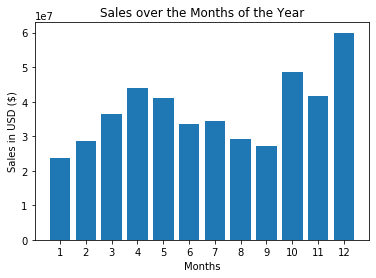

In [230]:
# Let's visualize
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(months, results['Sales'] )
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.title('Sales over the Months of the Year')
plt.show()

#### What US city has the hgihest number of sales

#### Add a City / State column

In [240]:
# Let's use apply()
# We could perform this thru a function
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# all_data = all_data.drop('City', axis = 1, inplace = True)
all_data['City / State'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ',' + ' ' + get_state(x))
# Directly w/o a function
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1]) 

In [241]:
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month,Sales,City / State
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4,23.90,"Dallas, TX"
1,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4,99.99,"Boston, MA"
2,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,"Los Angeles, CA"
3,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA"
4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA"


In [277]:
results_US_Cities = all_data.groupby('City / State').sum()

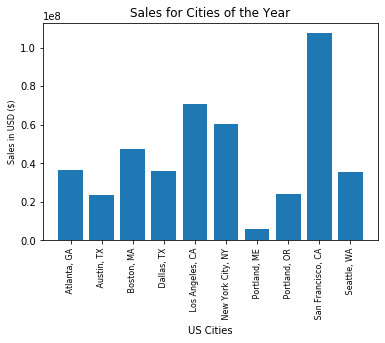

In [278]:
# Let's visualize
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City / State')]
plt.bar(cities, results_US_Cities['Sales'] )
plt.xticks(cities, rotation = 'vertical', fontsize = 8)
plt.ylabel('Sales in USD ($)', fontsize = 8)
plt.xlabel('US Cities')
plt.title('Sales for Cities of the Year')
plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying products

In [253]:
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month,Sales,City / State
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4,23.90,"Dallas, TX"
1,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4,99.99,"Boston, MA"
2,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,"Los Angeles, CA"
3,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA"
4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA"


In [254]:
# Convert Order Date to Date Time column
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [264]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1

In [265]:
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month,Sales,City / State,Hour,Minute,Count
0,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4,23.90,"Dallas, TX",8,46,1
1,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4,99.99,"Boston, MA",22,30,1
2,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,"Los Angeles, CA",14,38,1
3,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA",14,38,1
4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA",9,27,1


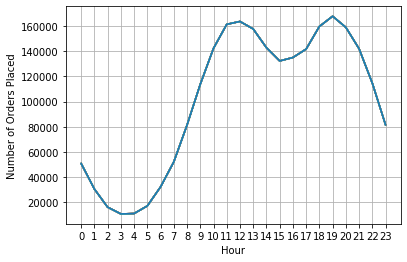

In [272]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders Placed')
plt.show()
# all_data.groupby('Hour').count()

### Observation: 11 am and 7 pm people buy place the order the most.
1. It would make more sense to advertise before and around 11 am and 7 pm

### What product sold the most?

In [293]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [294]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# Example:
# (from itertools import combinations
# from collections import Counter

# list3 = [[2, 3], [2, 3, 4]]

# count = Counter()

# for sublist in list3:
#     count.update(Counter(combinations(sublist, 2)))

# print(count))

# Import libraries
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# print(count)
    
for key, values in count.most_common(10):
    print(key, values)


('USB-C Charging Cable', 'USB-C Charging Cable') 24767457
('Lightning Charging Cable', 'Lightning Charging Cable') 24191505
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 21974394
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 21806746
('Wired Headphones', 'Wired Headphones') 21260538
('Apple Airpods Headphones', 'Apple Airpods Headphones') 16945968
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 14548872
('iPhone', 'iPhone') 9003137
('27in FHD Monitor', '27in FHD Monitor') 7953816
('Google Phone', 'Google Phone') 7448844


The business could group the Lightning Charging Cable with the iPhones to maximize the revenue, and the same with the other pairs

### What product sold the most? Why do you think it sold the most

In [295]:
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Month,Sales,City / State,Hour,Minute,Count
0,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,4,23.90,"Dallas, TX",8,46,1
1,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,4,99.99,"Boston, MA",22,30,1
2,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,"Los Angeles, CA",14,38,1
3,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA",14,38,1
4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,4,11.99,"Los Angeles, CA",9,27,1


In [296]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


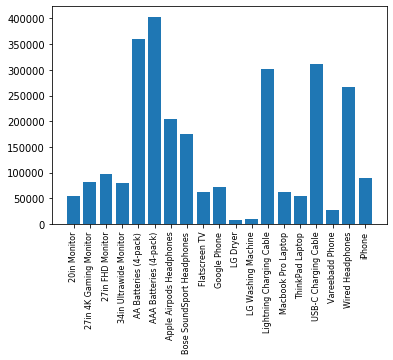

In [299]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

In [301]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

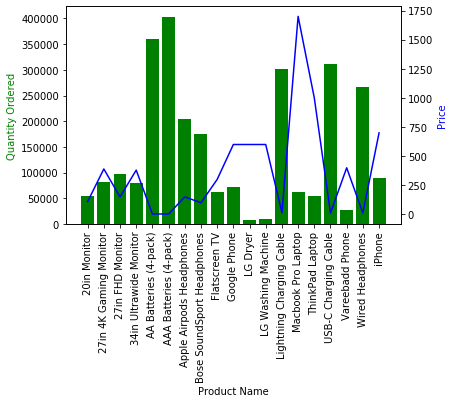

In [307]:
# https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation = 'vertical')
plt.show()

Conclusions:
1. From the chart above it shows that the cheaper product sold the most
2. MacbookPro Labtop sold more than the washing machine even though the labtops are more expensive because of the more users (students, corporations, etc.)